# Soal 1. Pemahaman k-means clustering

Jelaskan bagaimana cara kerja k-means clustering!

Jawab disini:




mengelompokan data ke dalam grup yang berbeda berdasarkan variable tertentu. dimana setiap cluster akan diasosiasikan dengan centruid

Download disini [pelanggan.csv](https://drive.google.com/uc?export=download&id=1jX_rLPfcCfzEEgy9xaoALmpqfU2s5TTB)

In [2]:
import pandas as pd
df = pd.read_csv('pelanggan_supermarket.csv')
df.head()

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0


# Soal 2. Clustering data menggunakan k-means clustering

Dalam soal ini, kalian diminta untuk melakukan clustering antara data Umur dan Skor Belanja(1-100). Namun, clustering tidak bisa dilakukan karena data memiliki outlier dan missing value. Maka, lakukanlah tahapan-tahapan berikut:

*   Handling missing value dengan menggunakan method ='ffill'
*   Handling outlier menggunakan metode Interquartile range
*   Lakukan rescaling data menggunakan StandardScaler
*   Lakukan clustering menggunakan kmeans clustering dengan k =2, dan visualisasikan.. 
*   Gunakan Elbow method untuk menemukan jumlah k kluster yang tepat
*   Gunakan k=3 (rekomendasi methode Elbow) lalu visualisasikan
*   Hitung silhoutte Coefficient dari ke dua hasil prediksi klustering tersebut










In [4]:
df.fillna(method = 'ffill', inplace = True)

In [ ]:
with sns.axes_style(style='ticks'):
  g = sns.catplot()

In [53]:
import seaborn as sns
import numpy as np
import random

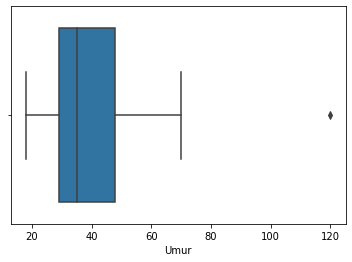

In [10]:
sns.boxplot(x='Umur', data=df)

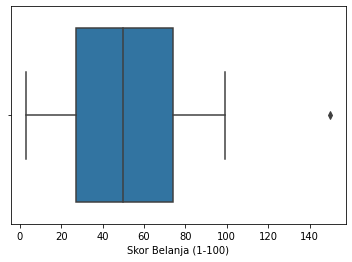

In [11]:
sns.boxplot(x='Skor Belanja (1-100)', data=df)

In [15]:
def iqr_outlier(data,alpha):
  q75, q25 = np.percentile(data, [75 ,25])
  iqr = q75 - q25
  upperbound=q75+(iqr*alpha)
  lowerbound=q25-(iqr*alpha)
  return upperbound,lowerbound

In [16]:
upperu, loweru = iqr_outlier(df['Umur'], alpha = 1.5)
print(upperu, loweru)

76.5 0.5


In [17]:
uppers, lowers = iqr_outlier(df['Skor Belanja (1-100)'], alpha = 1.5)
print(uppers, lowers)

144.5 -43.5


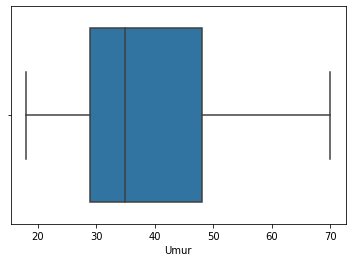

In [20]:
df_u = df[(df['Umur']<upperu) & (df['Umur']>loweru)]
sns.boxplot(x='Umur', data=df_u)

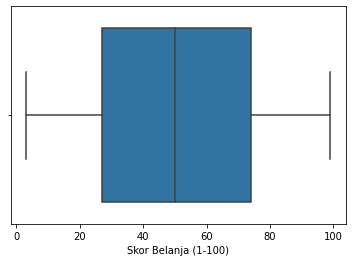

In [29]:
df_s = df[(df['Skor Belanja (1-100)']<uppers) & (df['Skor Belanja (1-100)']>lowers)]
sns.boxplot(x='Skor Belanja (1-100)', data=df_s)

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [59]:
temp = []
for i in range(2):
  temp.append(random.randint(-43, 144))
temp

[108, 28]

In [30]:
def remove_out_iqr (df):
  q1 = df.quantile(0.25)
  q3 = df.quantile(0.75)
  iqr = q3-q1
  df_final = df[~((df<(q1-1.5*iqr)) | (df>(q3+1.5*iqr)))]
  return df_final

In [32]:
df_out_remove = remove_out_iqr(df[['Umur', 'Skor Belanja (1-100)']])

df_out_remove.dropna(axis = 0, inplace = True)

In [64]:
df_out_remove = df_out_remove.append(pd.DataFrame({'Umur':[38.0,62.0], 'Skor Belanja (1-100)':[108.0,28.0]}), ignore_index=True)
df_out_remove

,Umur,Skor Belanja (1-100)
0,19.0,39.0
1,21.0,81.0
2,20.0,6.0
3,23.0,77.0
4,31.0,40.0
...,...,...
245,35.0,90.0
246,37.0,32.0
247,32.0,86.0
248,38.0,108.0


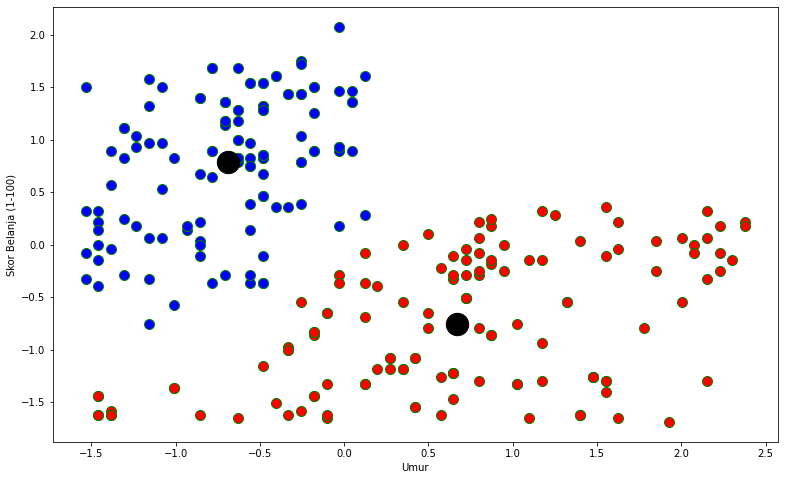

In [73]:
ax, fig = plt.subplots(figsize = (13, 8))
sc = StandardScaler()
df_out_std = sc.fit_transform(df_out_remove.astype(float))

kmeans1 = KMeans(n_clusters=2).fit(df_out_std)
labels1 = kmeans1.labels_

new_dfout_std = pd.DataFrame(data = df_out_std, columns = ['Umur','Skor Belanja (1-100)'])
new_dfout_std['label_kmeans1'] = labels1
# df.insert(2, 'label_kmeans1', labels1, True)

plt.scatter(new_dfout_std.Umur[new_dfout_std.label_kmeans1 == 0], new_dfout_std['Skor Belanja (1-100)'][new_dfout_std.label_kmeans1 == 0], c = 'blue', s = 100, edgecolor = 'green', linestyle = '-')
plt.scatter(new_dfout_std.Umur[new_dfout_std.label_kmeans1 == 1], new_dfout_std['Skor Belanja (1-100)'][new_dfout_std.label_kmeans1 == 1], c = 'red', s = 100, edgecolor = 'green', linestyle = '-')

centers = kmeans1.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 500)
plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100)')
plt.show()

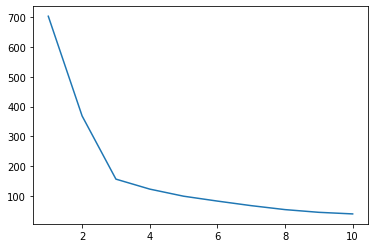

In [100]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(new_dfout_std)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.show()

In [87]:
kmeans2 = KMeans(n_clusters = 3, init = 'k-means++').fit(df_out_std)
kmeans2.labels_

array([0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 0, 1, 1, 2, 1, 0, 1, 0,
       1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2,
       1, 2, 0, 0, 0, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2,
       2, 1, 0, 2, 2, 2, 2, 2, 1, 2, 0, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1,
       2, 2, 0, 2, 0, 0, 1, 2, 1, 2, 1, 0, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2,
       1, 0, 0, 1, 1, 2, 2, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2, 1, 2, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2,
       1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2,
       0, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1,
       2, 1, 2, 1, 0, 1, 1, 2], dtype=int32)

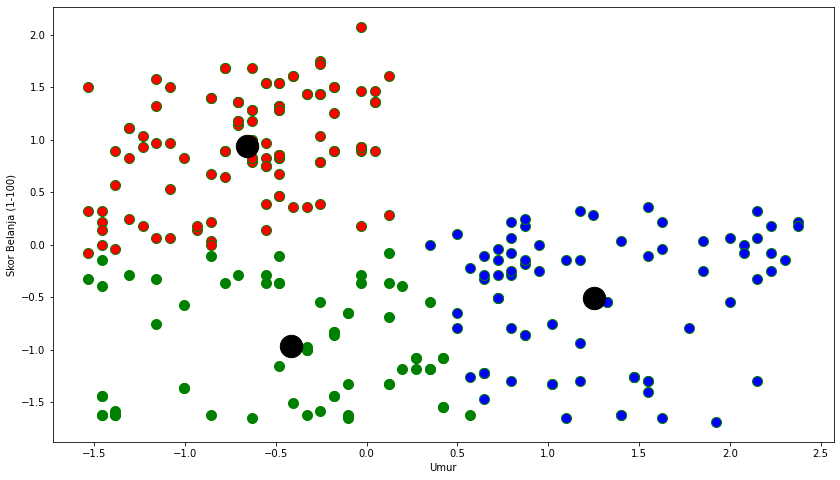

In [99]:
ax, fig = plt.subplots(figsize=(14,8))

labels2 = kmeans2.labels_


new_dfout_std['label_kmeans2'] = labels2
# df.insert(2, 'label_kmeans1', labels1, True)

plt.scatter(new_dfout_std.Umur[new_dfout_std.label_kmeans2 == 0], new_dfout_std['Skor Belanja (1-100)'][new_dfout_std.label_kmeans2 == 0], c = 'blue', s = 100, edgecolor = 'green', linestyle = '-')
plt.scatter(new_dfout_std.Umur[new_dfout_std.label_kmeans2 == 1], new_dfout_std['Skor Belanja (1-100)'][new_dfout_std.label_kmeans2 == 1], c = 'red', s = 100, edgecolor = 'green', linestyle = '-')
plt.scatter(new_dfout_std.Umur[new_dfout_std.label_kmeans2 == 2], new_dfout_std['Skor Belanja (1-100)'][new_dfout_std.label_kmeans2 == 2], c = 'green', s = 100, edgecolor = 'green', linestyle = '-')

centers = kmeans2.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 500)
plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100)')
plt.show()

In [93]:
new_dfout_std

,Umur,Skor Belanja (1-100),label_kmeans1,label_kmeans2
0,-1.458621,-0.399215,0,0
1,-1.308186,1.107527,0,1
2,-1.383403,-1.583084,1,0
3,-1.157750,0.964028,0,1
4,-0.556009,-0.363340,0,0
...,...,...,...,...
245,-0.255138,1.430400,0,1
246,-0.104703,-0.650339,1,0
247,-0.480791,1.286901,0,1
248,-0.029485,2.076147,0,1


Expected output:

n_cluster =2

![](https://drive.google.com/uc?id=1RHedPeGR48w-cWl7WWkIsHTSB2DRgynO)


Elbow graph

![](https://drive.google.com/uc?id=1S3_uvQWzJCi8YwSBbpu2imKbUBZ3JdmV)

n_cluster =3

![](https://drive.google.com/uc?id=1EVMDQgPpC8vYpfxilyiJMRDNIr-JXULd)

segmen 1 mempunya skor belanja rata rata paling tinggi dibandingkan dengan segmen 1 dan 2

# Soal 3. Analisa Data Hasil Clustering

Dari hasil klustering diatas, buatlah sebuah analisa segmentasi pelanggan untuk kemajuan supermarket. 

Jawab disini: